In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

plt.style.use('matplotlib.mplstyle')

DATA_DIR = 'Data/'
data_name = 'summary.txt'

col_names = ['Step','t','M','LogL','LogR',
             'LogTs','LogTc','Logrhoc','logPc','psic',
             'Xc','Yc','XCc','XNc','XOc',
             'taudyn','tauKH','taunuc','Lpp','LCNO',
             'L3a','LZ','Lv','MHe','MC',
             'MO','RHe','RC','RO']

masses = np.array([0.1, 0.5, 1, 1.5, 2,
                   3, 5, 8, 10, 15,
                   20, 30, 50, 100])

metallicities = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03])

In [2]:
# Importing summary files and combining them into a single dataframe (i = 1)
dataframes = {}

for i,mass in enumerate(masses):
    # Only import second row (i = 1) 
    df = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/'+'summary.txt',
                     delim_whitespace=True, header=None,
                     skiprows=1, nrows=1)
        
    dataframes[i] = df

# Combining individual dataframes
df = pd.concat(dataframes.values(), axis=0,
               ignore_index=True)

df.columns = col_names

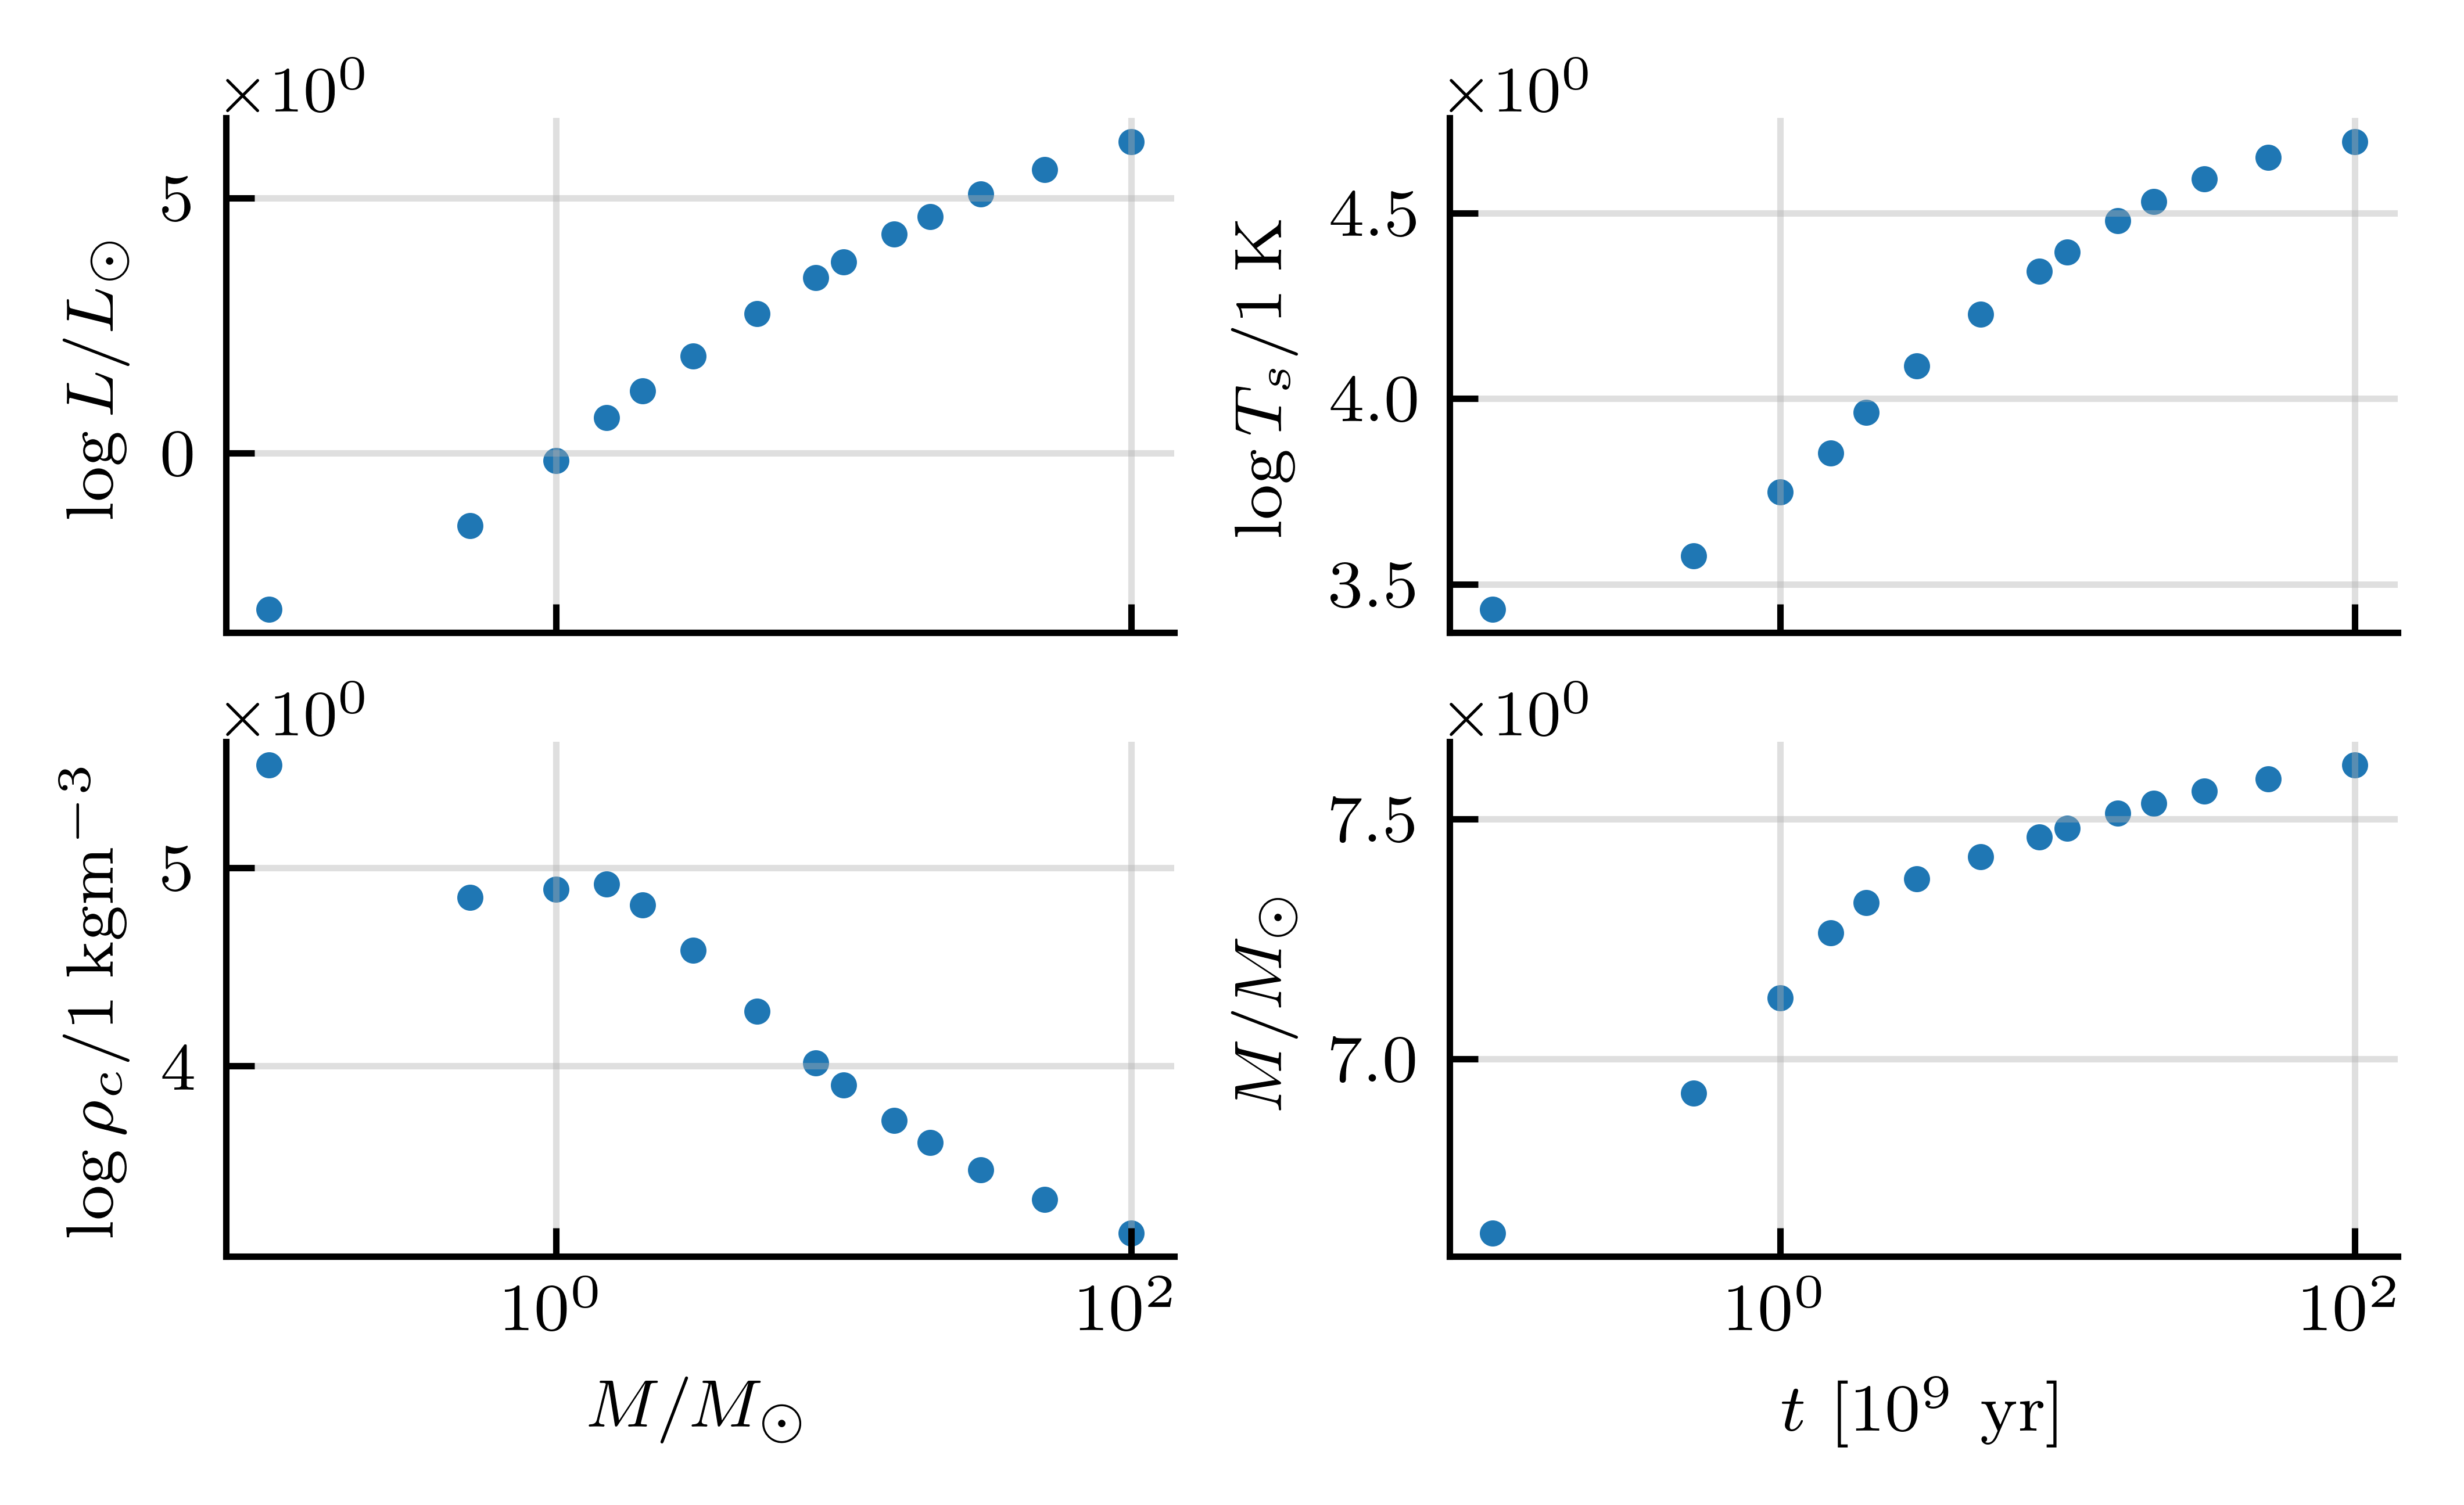

In [3]:
# Plotting M vs Tc, rhoc, L, Ts
from matplotlib.ticker import ScalarFormatter

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

fig, axs = plt.subplots(2,2, sharex= True)
axs[0,0].scatter(df['M'],df['LogL'],s=5)
axs[0,0].set_ylabel(r"$\log L/L_\odot$")
axs[0,0].set_xscale('log')

axs[0,1].scatter(df['M'],df['LogTs'],s=5)
axs[0,1].set_ylabel(r"$\log T_s / 1 \: \mathrm{K}$")

axs[1,0].scatter(df['M'],df['Logrhoc'],s=5)
axs[1,0].set_xlabel(r"$M/M_\odot$")
axs[1,0].set_ylabel(r"$\log \rho_c / \mathrm{1 \: kg m^{-3}}$")

axs[1,1].scatter(df['M'],df['LogTc'],s=5)
axs[1,1].set_xlabel(r"$t \ [\mathrm{10^9 \ yr}]$")
axs[1,1].set_ylabel(r"$M/M_\odot$")

x_pos = 0.0
y_pos = 1.0
offset_text = r'$\times \mathrm{10^{0}}$'
horizontalalignment='left'
verticalalignment='bottom'

for ax in axs.flat:
    ax.yaxis.set_minor_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
                horizontalalignment=horizontalalignment,
                verticalalignment=verticalalignment, fontsize = 8)
    ax.grid(which='both', alpha=0.4, visible=True)

C:\Users\beepp\AppData\Local\Temp\ipykernel_15044\2848888070.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)


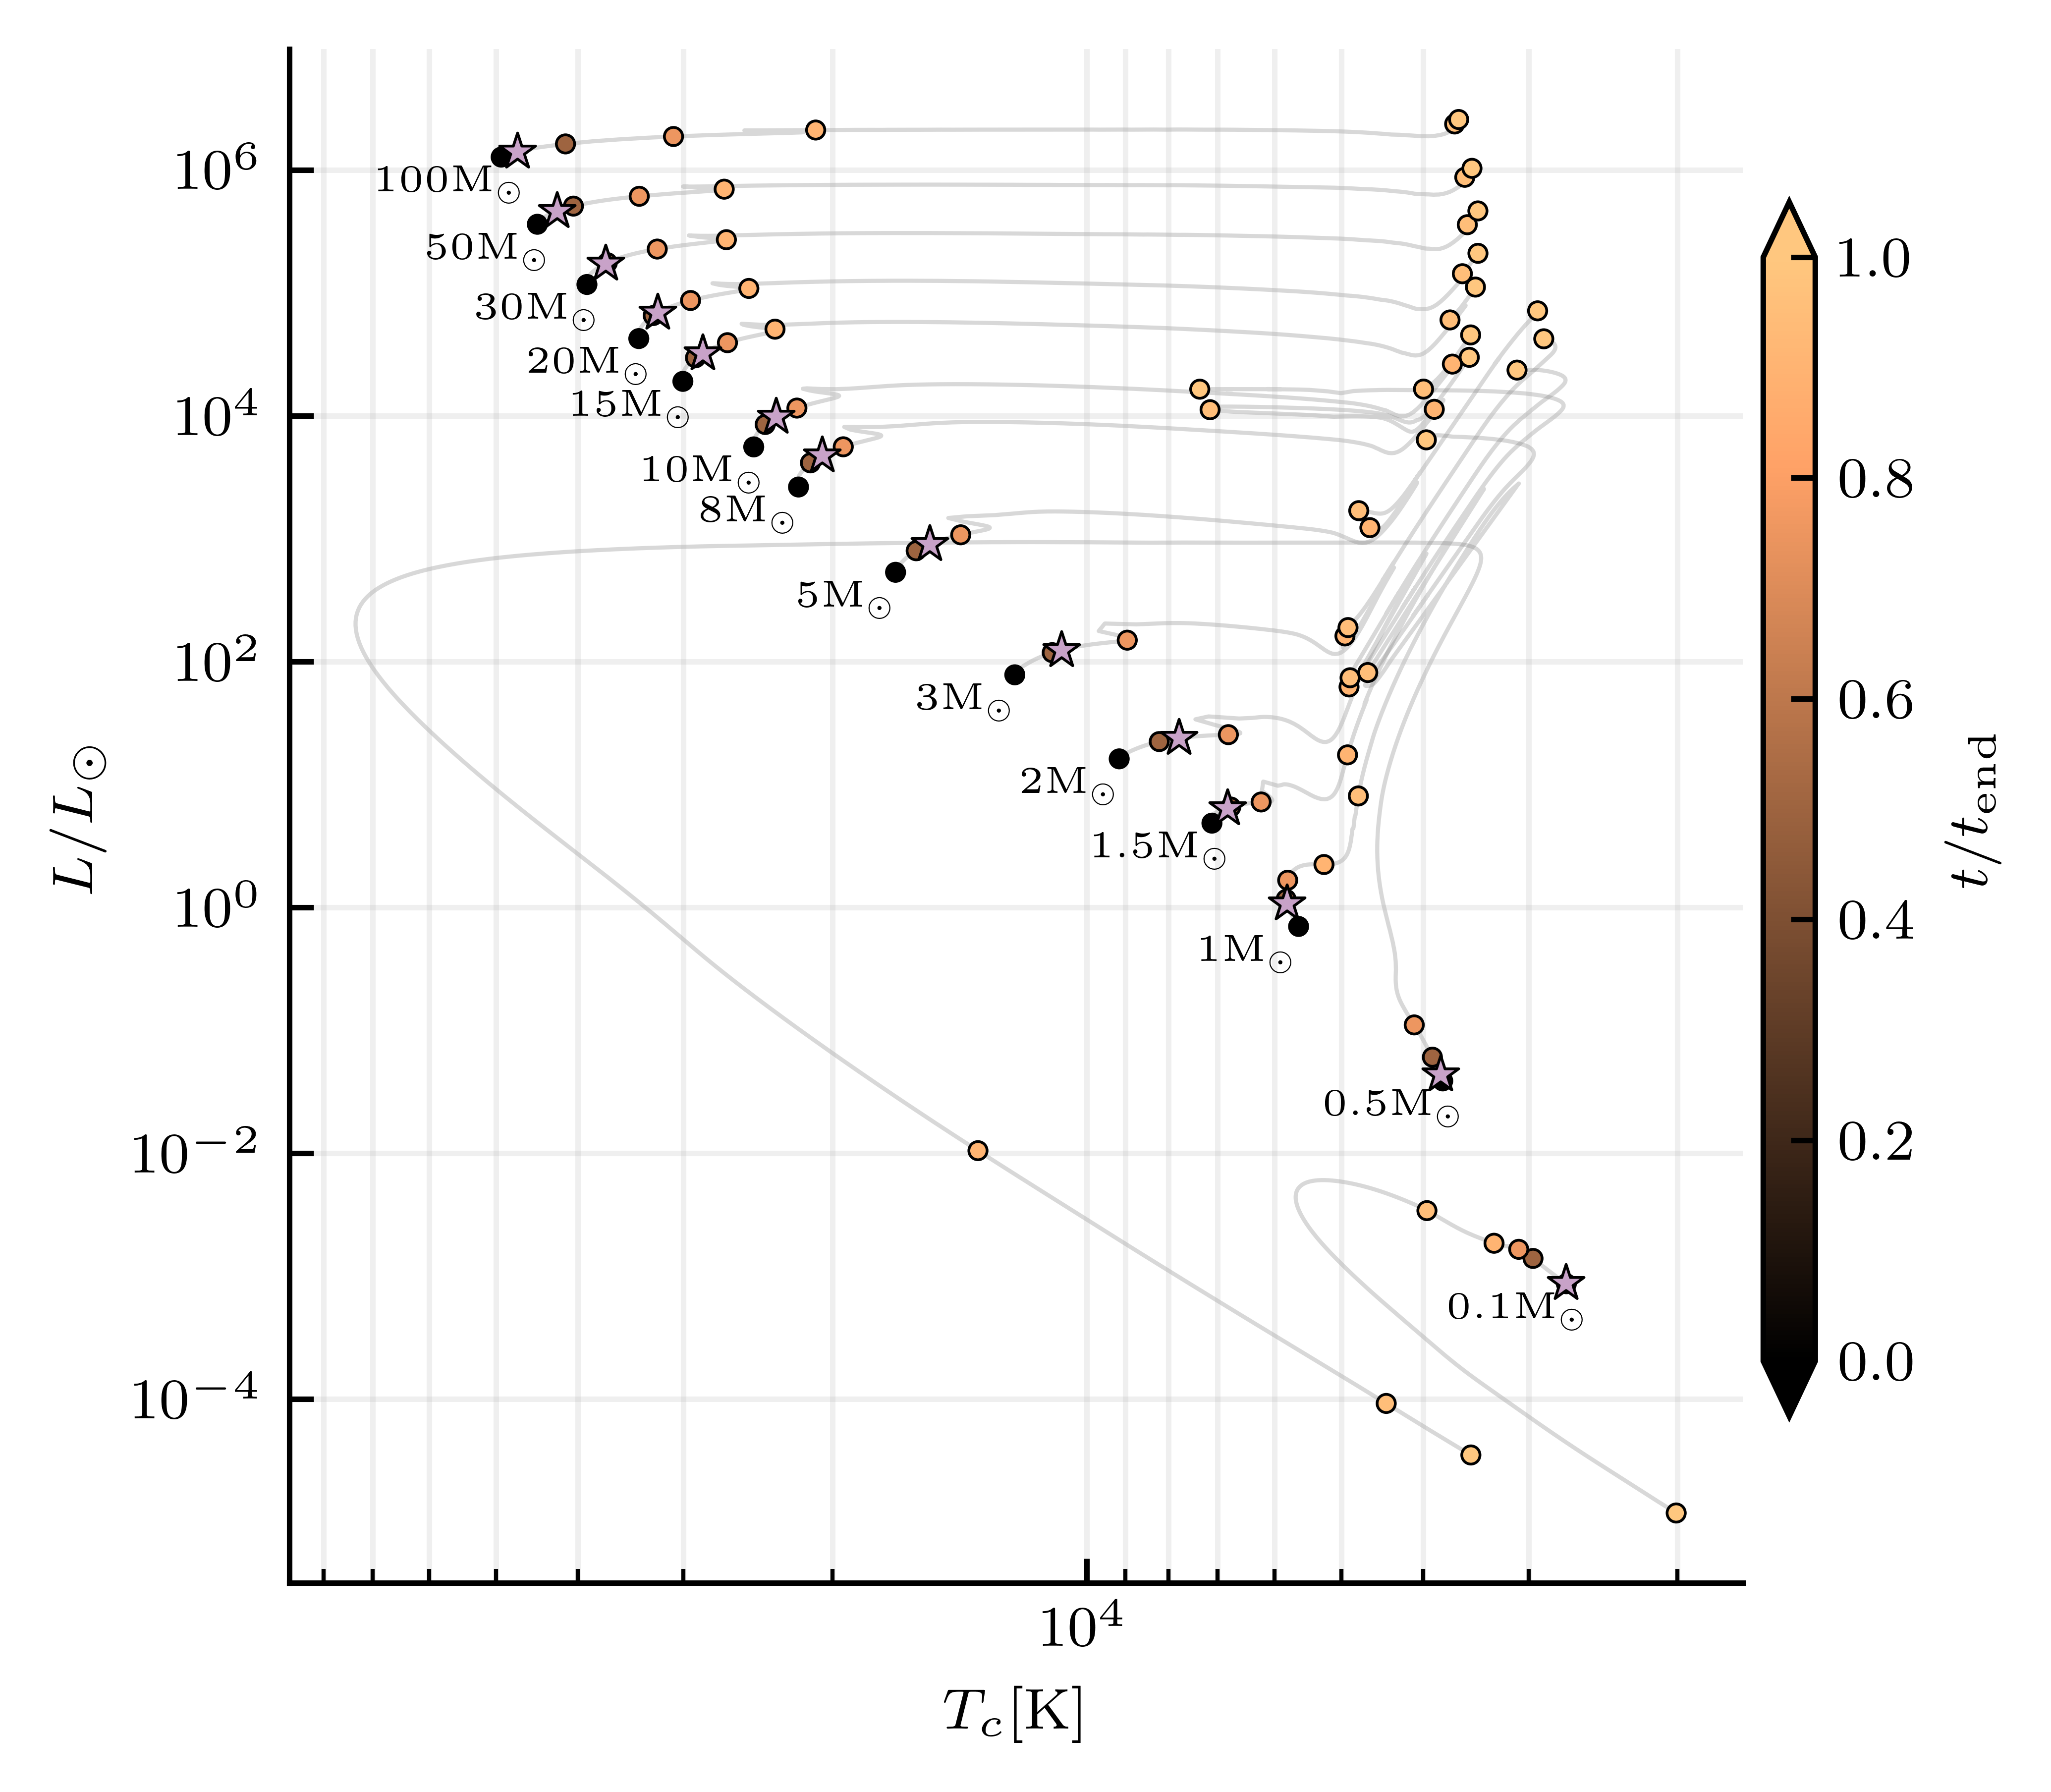

In [22]:
# HR diagram (metallicity constant)
def HR_plot(masses,time_frac,distinct_styles=False,annotated=False):
    fig,ax = plt.subplots(figsize=(3.5,3.5))

    cmap = cm.copper
    norm = mcolors.Normalize(vmin=0,vmax=1)

    if distinct_styles == True:
        line_styles = np.array(['-',':','--','-.'])
        mark_styles = np.array(['o','^','s','d'])
    else:
        line_styles = np.array(['-'])
        mark_styles = np.array(['o'])


    for i,mass in enumerate(masses):
        # Import data
        df_mass = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                delim_whitespace=True, header=None)
        df_mass.columns = col_names

        # Plot time evolution
        ax.plot(10**df_mass['LogTs'],10**df_mass['LogL'],c='grey',
                alpha=0.3, linewidth=0.6, zorder=1, linestyle=line_styles[i%len(line_styles)])
        
        # Optional scatter time evolution
        '''
        color = cmap(norm(df_mass['t']/max(df_mass['t'])))
        ax.scatter(10**df_mass['LogTs'],10**df_mass['LogL'],
                   s=0.3, zorder=2, facecolors=color, marker='o')
        '''
                   
        # Scatter plot different snapshots
        time_frac_idx = [np.argmin(np.abs(df_mass['t'] - (t*np.max(df_mass['t']))))
                        for t in time_frac]

        color = cmap(norm(time_frac))

        ax.scatter(10**df_mass['LogTs'][time_frac_idx],10**df_mass['LogL'][time_frac_idx],
                        s=7, zorder=2, color=color, marker=mark_styles[i%len(mark_styles)],
                        edgecolors='k', linewidth=0.4)
        
        # Mark points of interest (currently i = 70, approx when time evolution comes to a crawl)
        lilac = np.array((200,162,200))/255
        ax.scatter(10**df_mass['LogTs'][70],10**df_mass['LogL'][70],
                        s=30, zorder=2, color=lilac, marker='*',
                        edgecolors='k', linewidth=0.4)

        if annotated==True:
            ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                        (10**df_mass['LogTs'][0],10**df_mass['LogL'][0]),
                        textcoords="offset points", xytext=(-7,-5), ha='center', fontsize=5.5)
        

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.xaxis.set_inverted(True)

    ax.set_xlabel(r'$T_c [\mathrm{K}]$')
    ax.set_ylabel(r'$L / L_\odot$')

    cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    cbar.set_label(r'$t/t_\mathrm{end}$')

    ax.grid(which='both', alpha=0.2, visible=True)

time_frac = np.array([0,.50,.75,.90,.95,1]) # Produce snapshots at these fractions of total simulated time

masses2 = np.array([0.1,0.5,2,30,100])

#HR_plot(masses2,time_frac)
#HR_plot(masses2,time_frac,distinct_styles=True)
HR_plot(masses,time_frac,annotated=True)

C:\Users\beepp\AppData\Local\Temp\ipykernel_15044\3235332415.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)


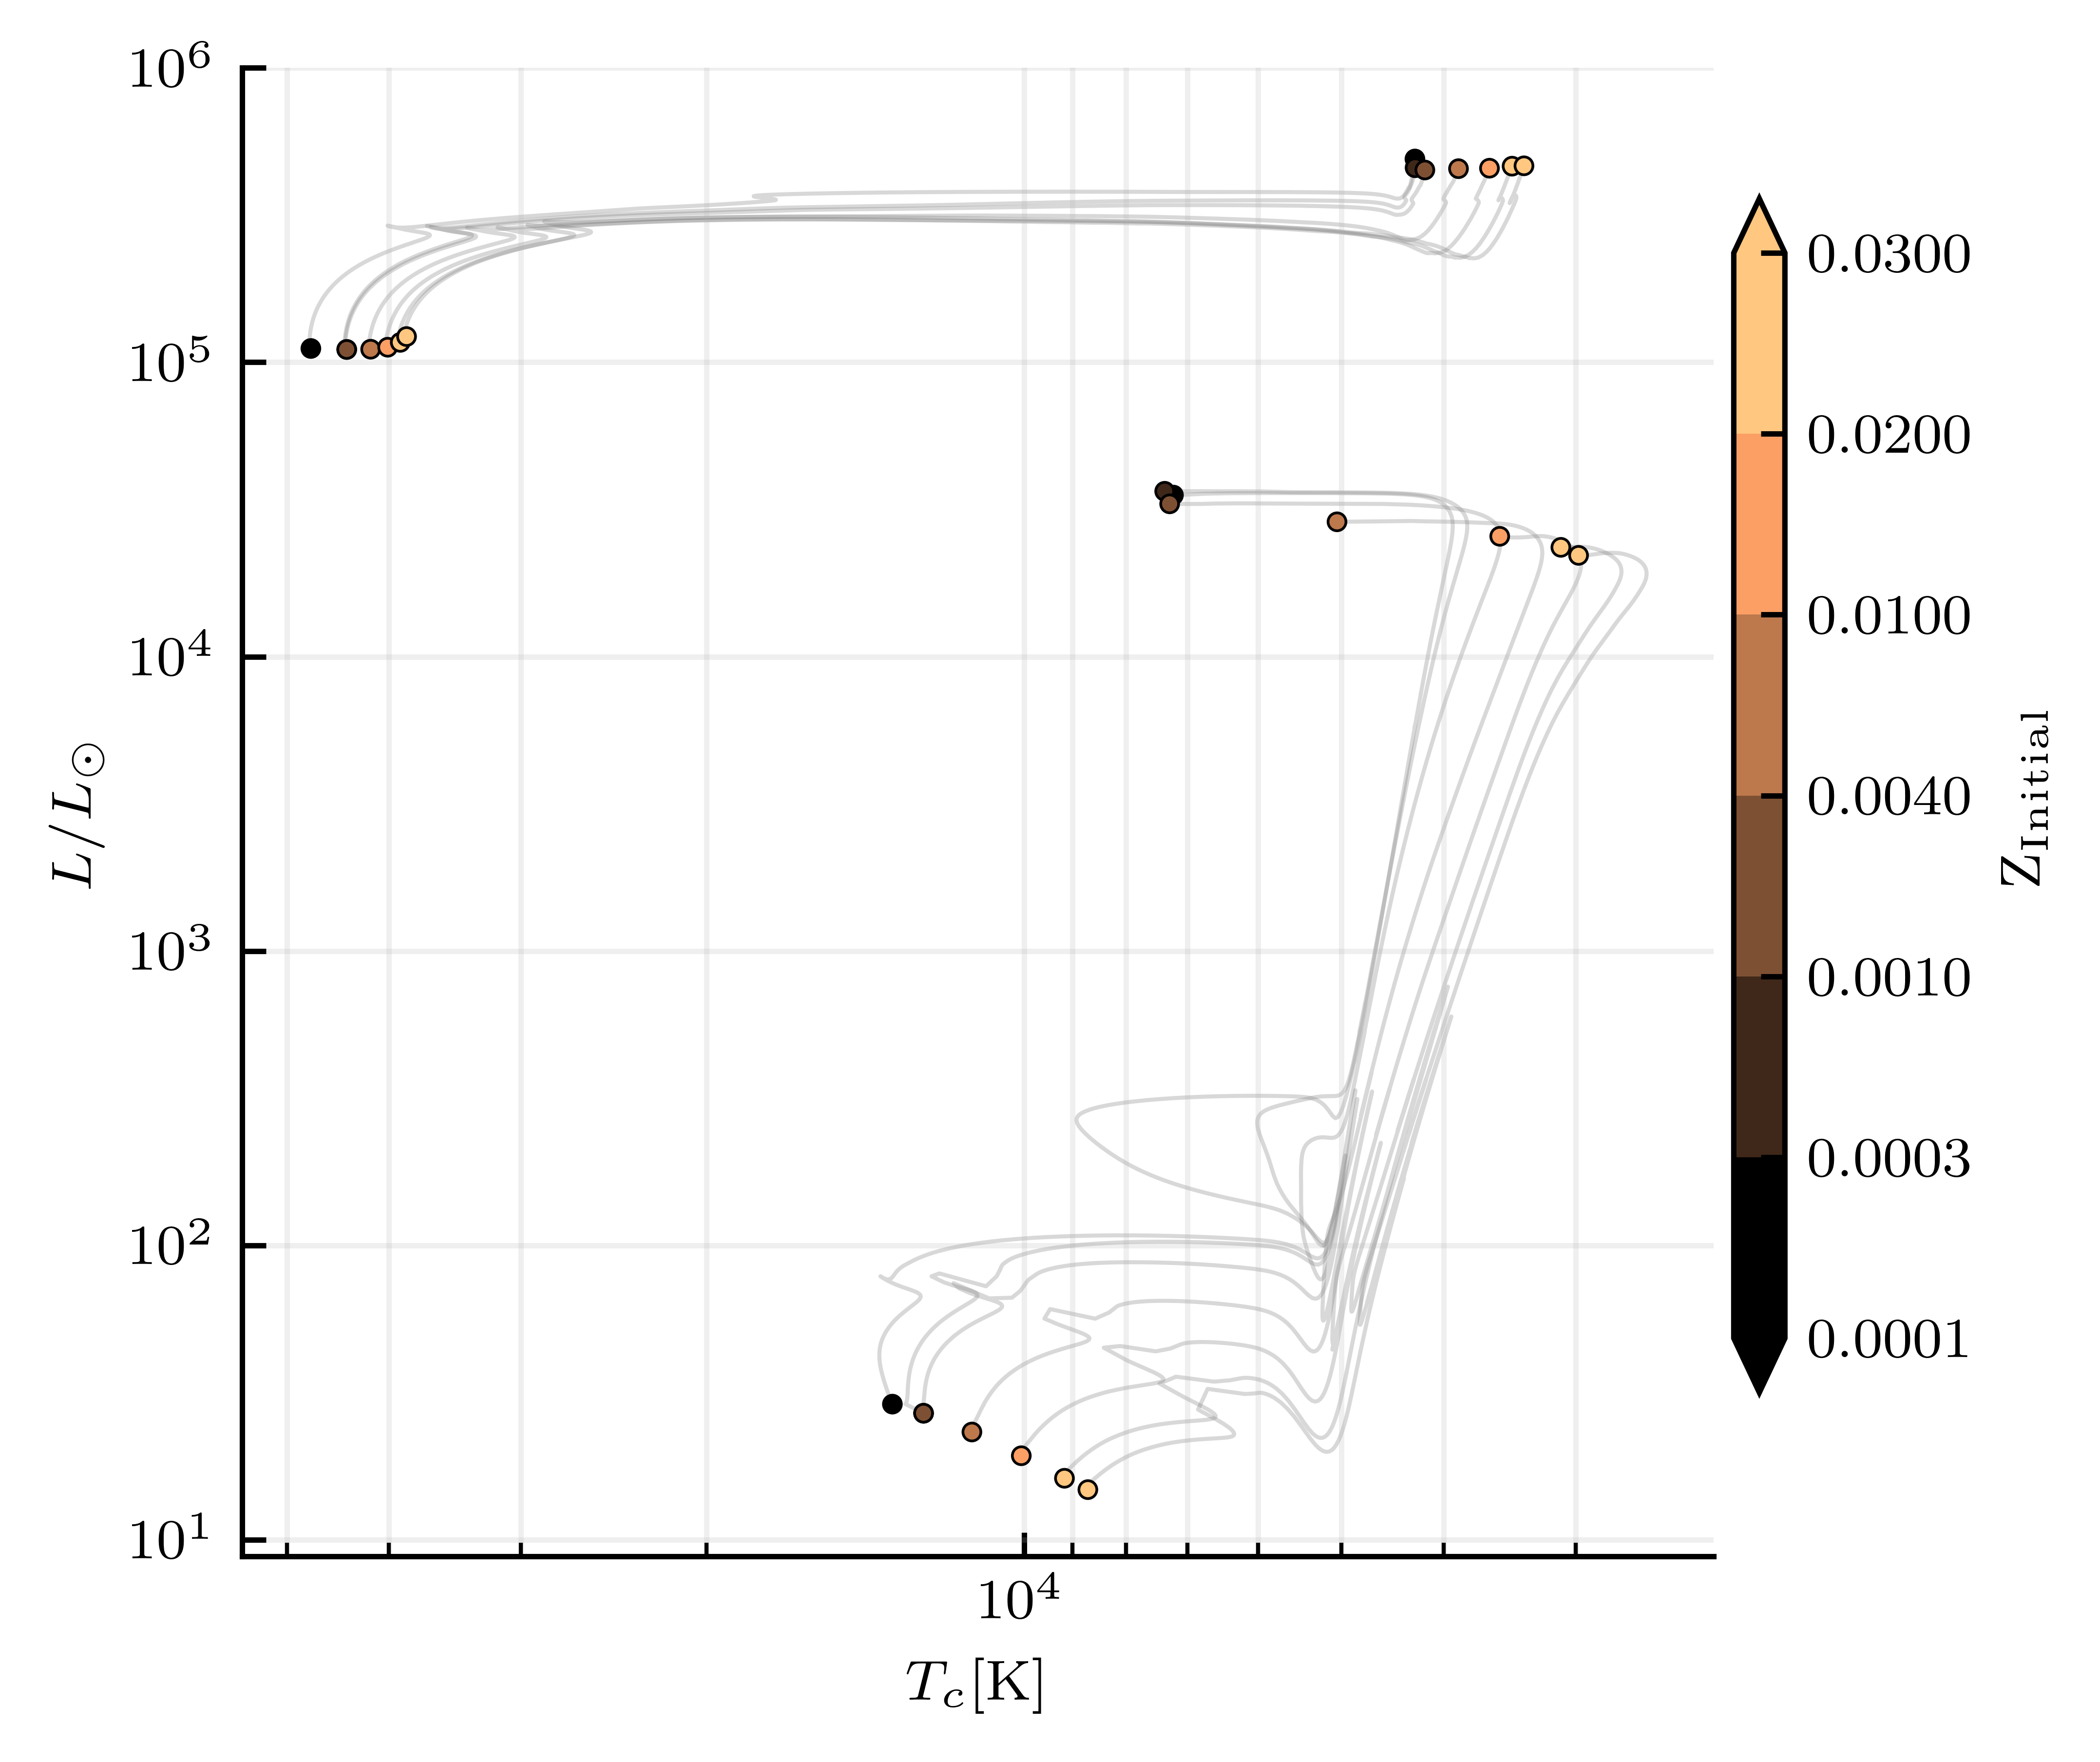

In [5]:
# HR diagram (varying metallicity)

def HR_plot_metal(metallicities,time_frac):
    fig,ax = plt.subplots(figsize=(3.5,3.5))

    # Create discrete colors 
    cmap = cm.copper
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mcolors.LinearSegmentedColormap.from_list('Z cmap', cmaplist, cmap.N)
    norm = mcolors.BoundaryNorm(metallicities,cmap.N)

    for Z in metallicities:
        for M in [2,30]:
            # Import data
            df_Z = pd.read_csv(DATA_DIR+f'{M:.3g}M_{Z:.3g}/summary.txt',
                               delim_whitespace=True, header=None)
            df_Z.columns = col_names

            # Time evolution
            ax.plot(10**df_Z['LogTs'],10**df_Z['LogL'],c='grey',
                    alpha=0.3, linewidth=0.6, zorder=1)
            
            # Scatter
            time_frac_idx = [np.argmin(np.abs(df_Z['t'] - (t*np.max(df_Z['t']))))
                        for t in time_frac]

            color = cmap(norm(metallicities))

            ax.scatter(10**df_Z['LogTs'][time_frac_idx],10**df_Z['LogL'][time_frac_idx],
                        s=7, zorder=2, edgecolors='k', linewidth=0.4,
                        c=[Z]*len(time_frac_idx),cmap=cmap,norm=norm)

    
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.xaxis.set_inverted(True)

    ax.set_xlabel(r'$T_c [\mathrm{K}]$')
    ax.set_ylabel(r'$L / L_\odot$')
    ax.set_yticks(10**np.array([1,2,3,4,5,6]))
    ax.yaxis.set_minor_locator(plt.NullLocator())

    cbar_ax = fig.add_axes([1., 0.2, 0.03, 0.7])  
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, extend = "both", aspect = 0.8)
    cbar.set_label(r'$\mathrm{Z_{Initial}}$')

    ax.grid(which='both', alpha=0.2, visible=True)
    #ax.set_ylim([1e-4,3e6])
    #ax.set_xlim([2500,6e4])

    ax.xaxis.set_inverted(True)

time_frac = np.array([0,1])
metallicities = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03])
HR_plot_metal(metallicities,time_frac)

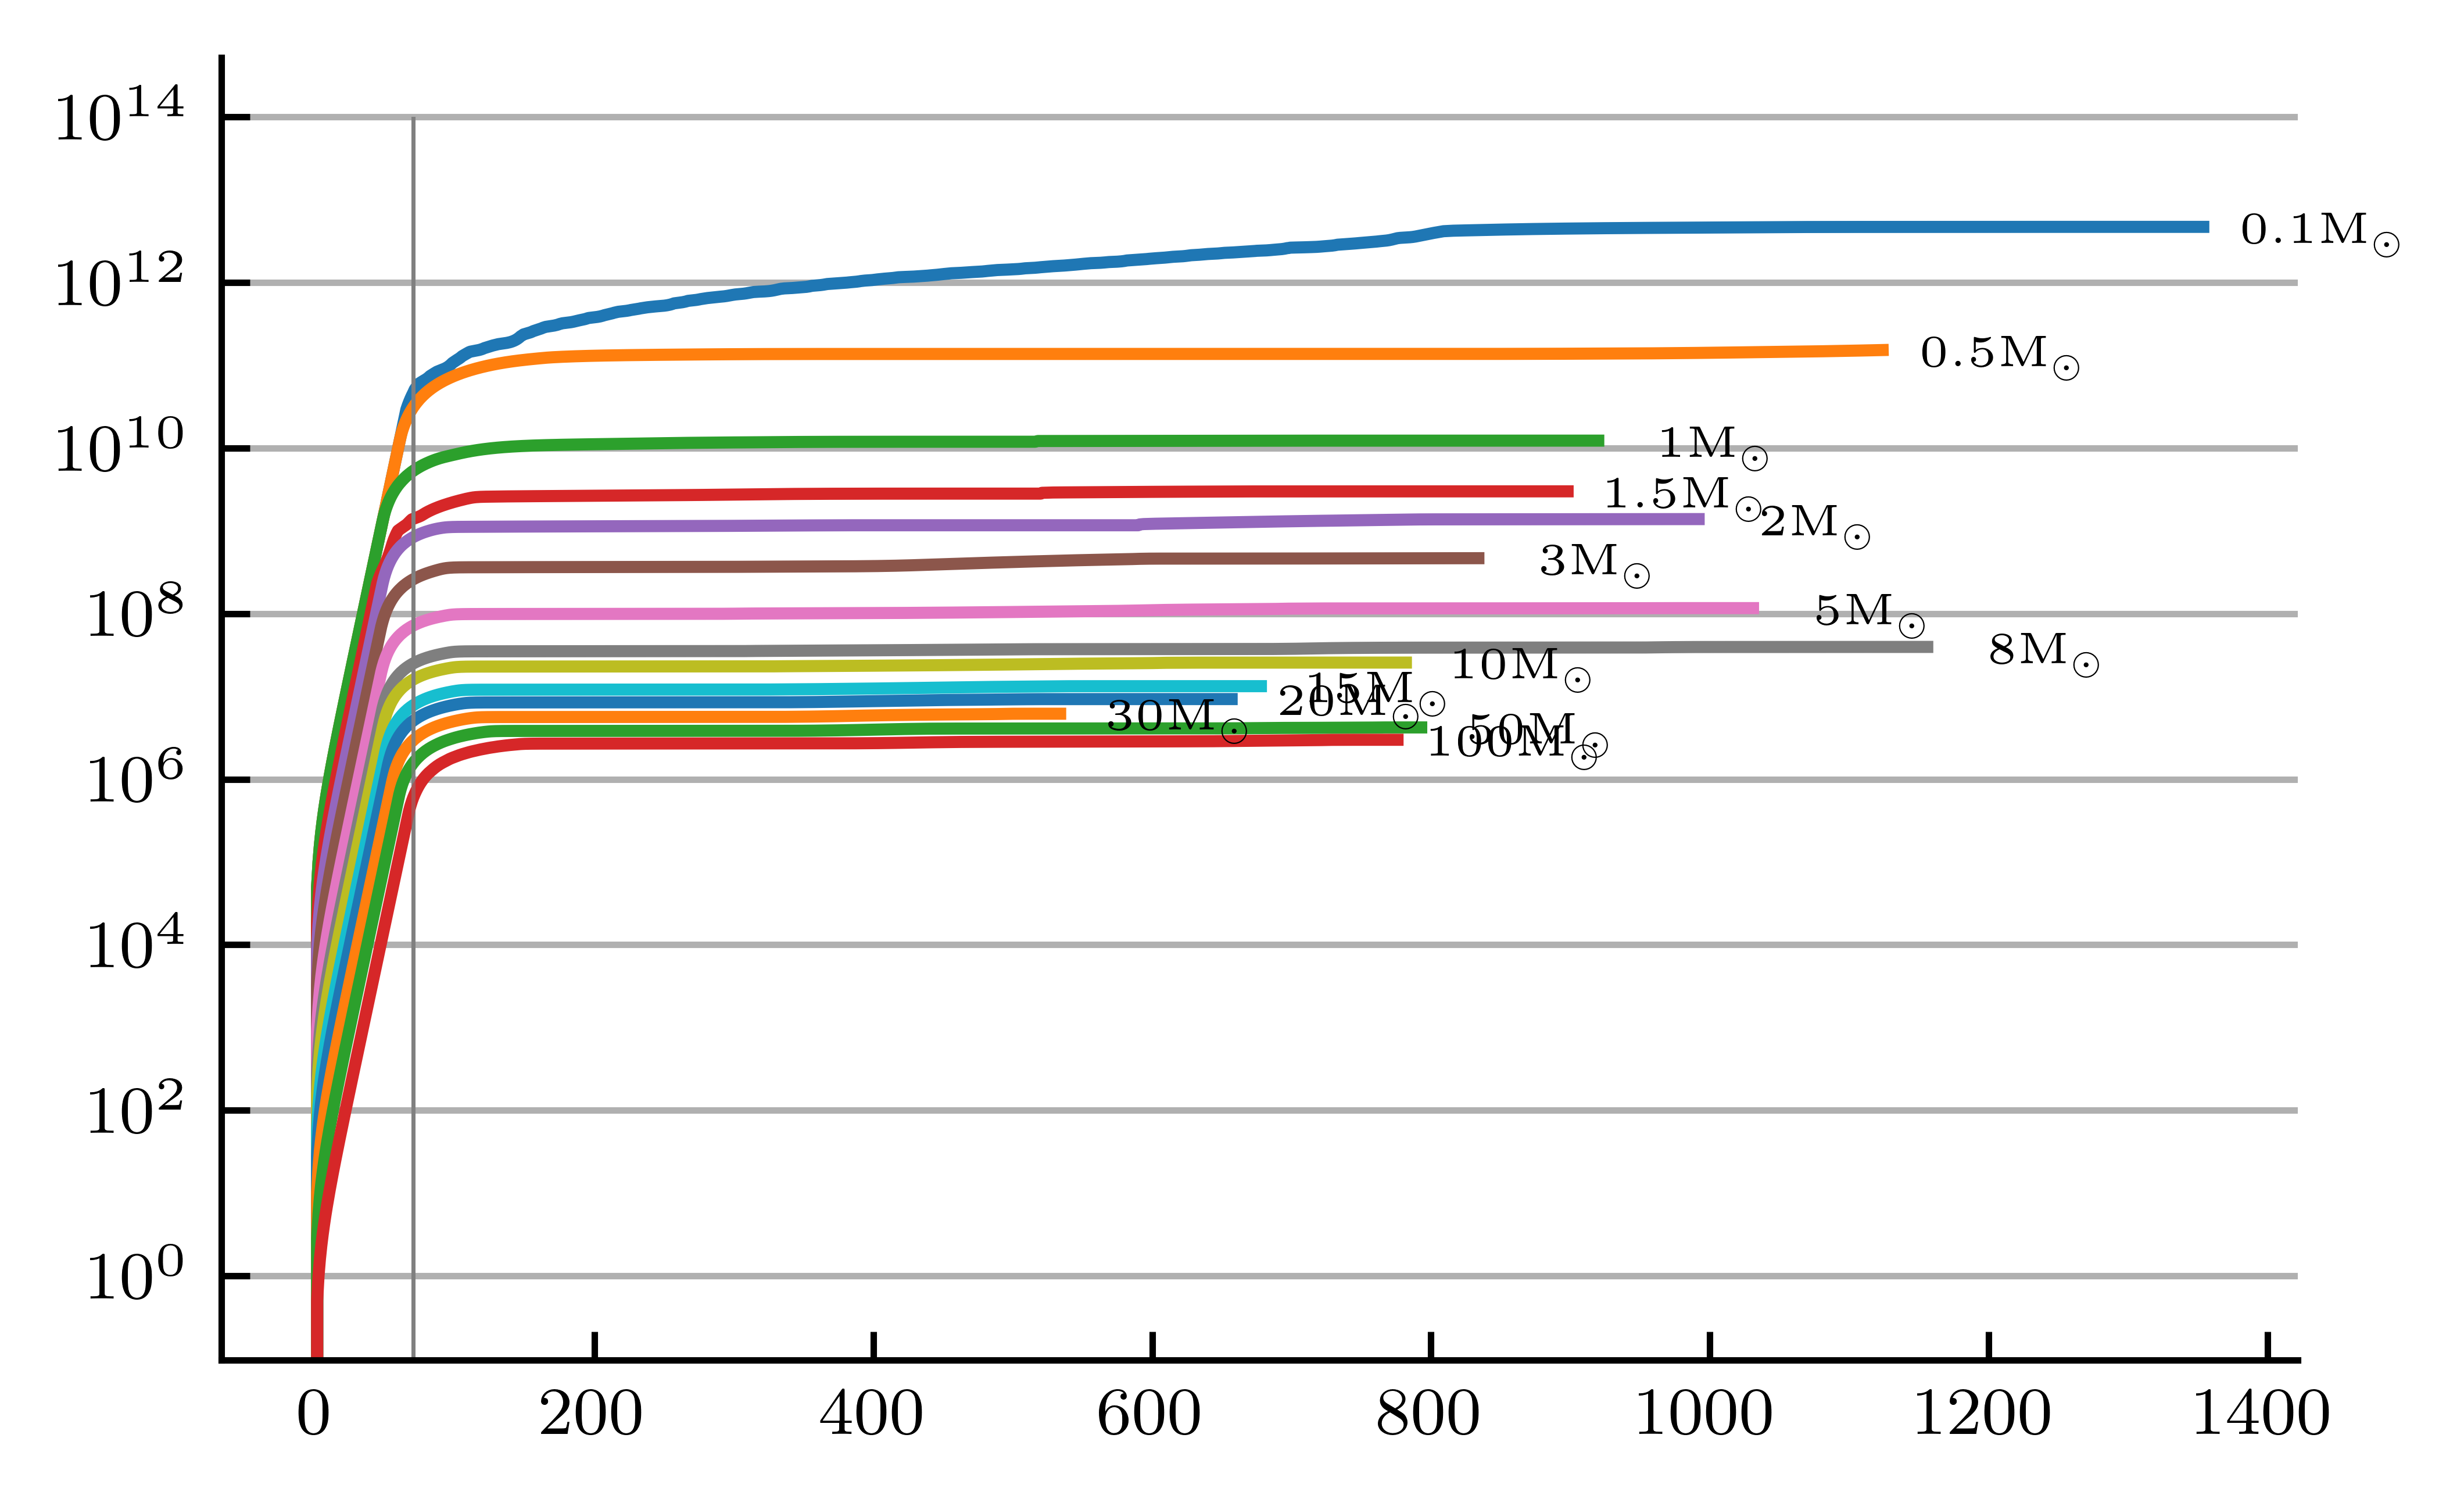

In [13]:
# steps vs time overview
fig,ax = plt.subplots()

for i,mass in enumerate(masses):
    df_time = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                delim_whitespace=True, header=None)
    df_time.columns = col_names
    ax.semilogy(df_time['Step'],df_time['t'])
    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                        (np.array(df_time['Step'])[-1],np.array(df_time['t'])[-1]),
                        textcoords="offset points", xytext=(15,-2), ha='center', fontsize=5.5)
    
    ax.vlines(x=[70],ymin=0,ymax=10e13,
              linewidth=0.5,color='gray',alpha=0.5)
    

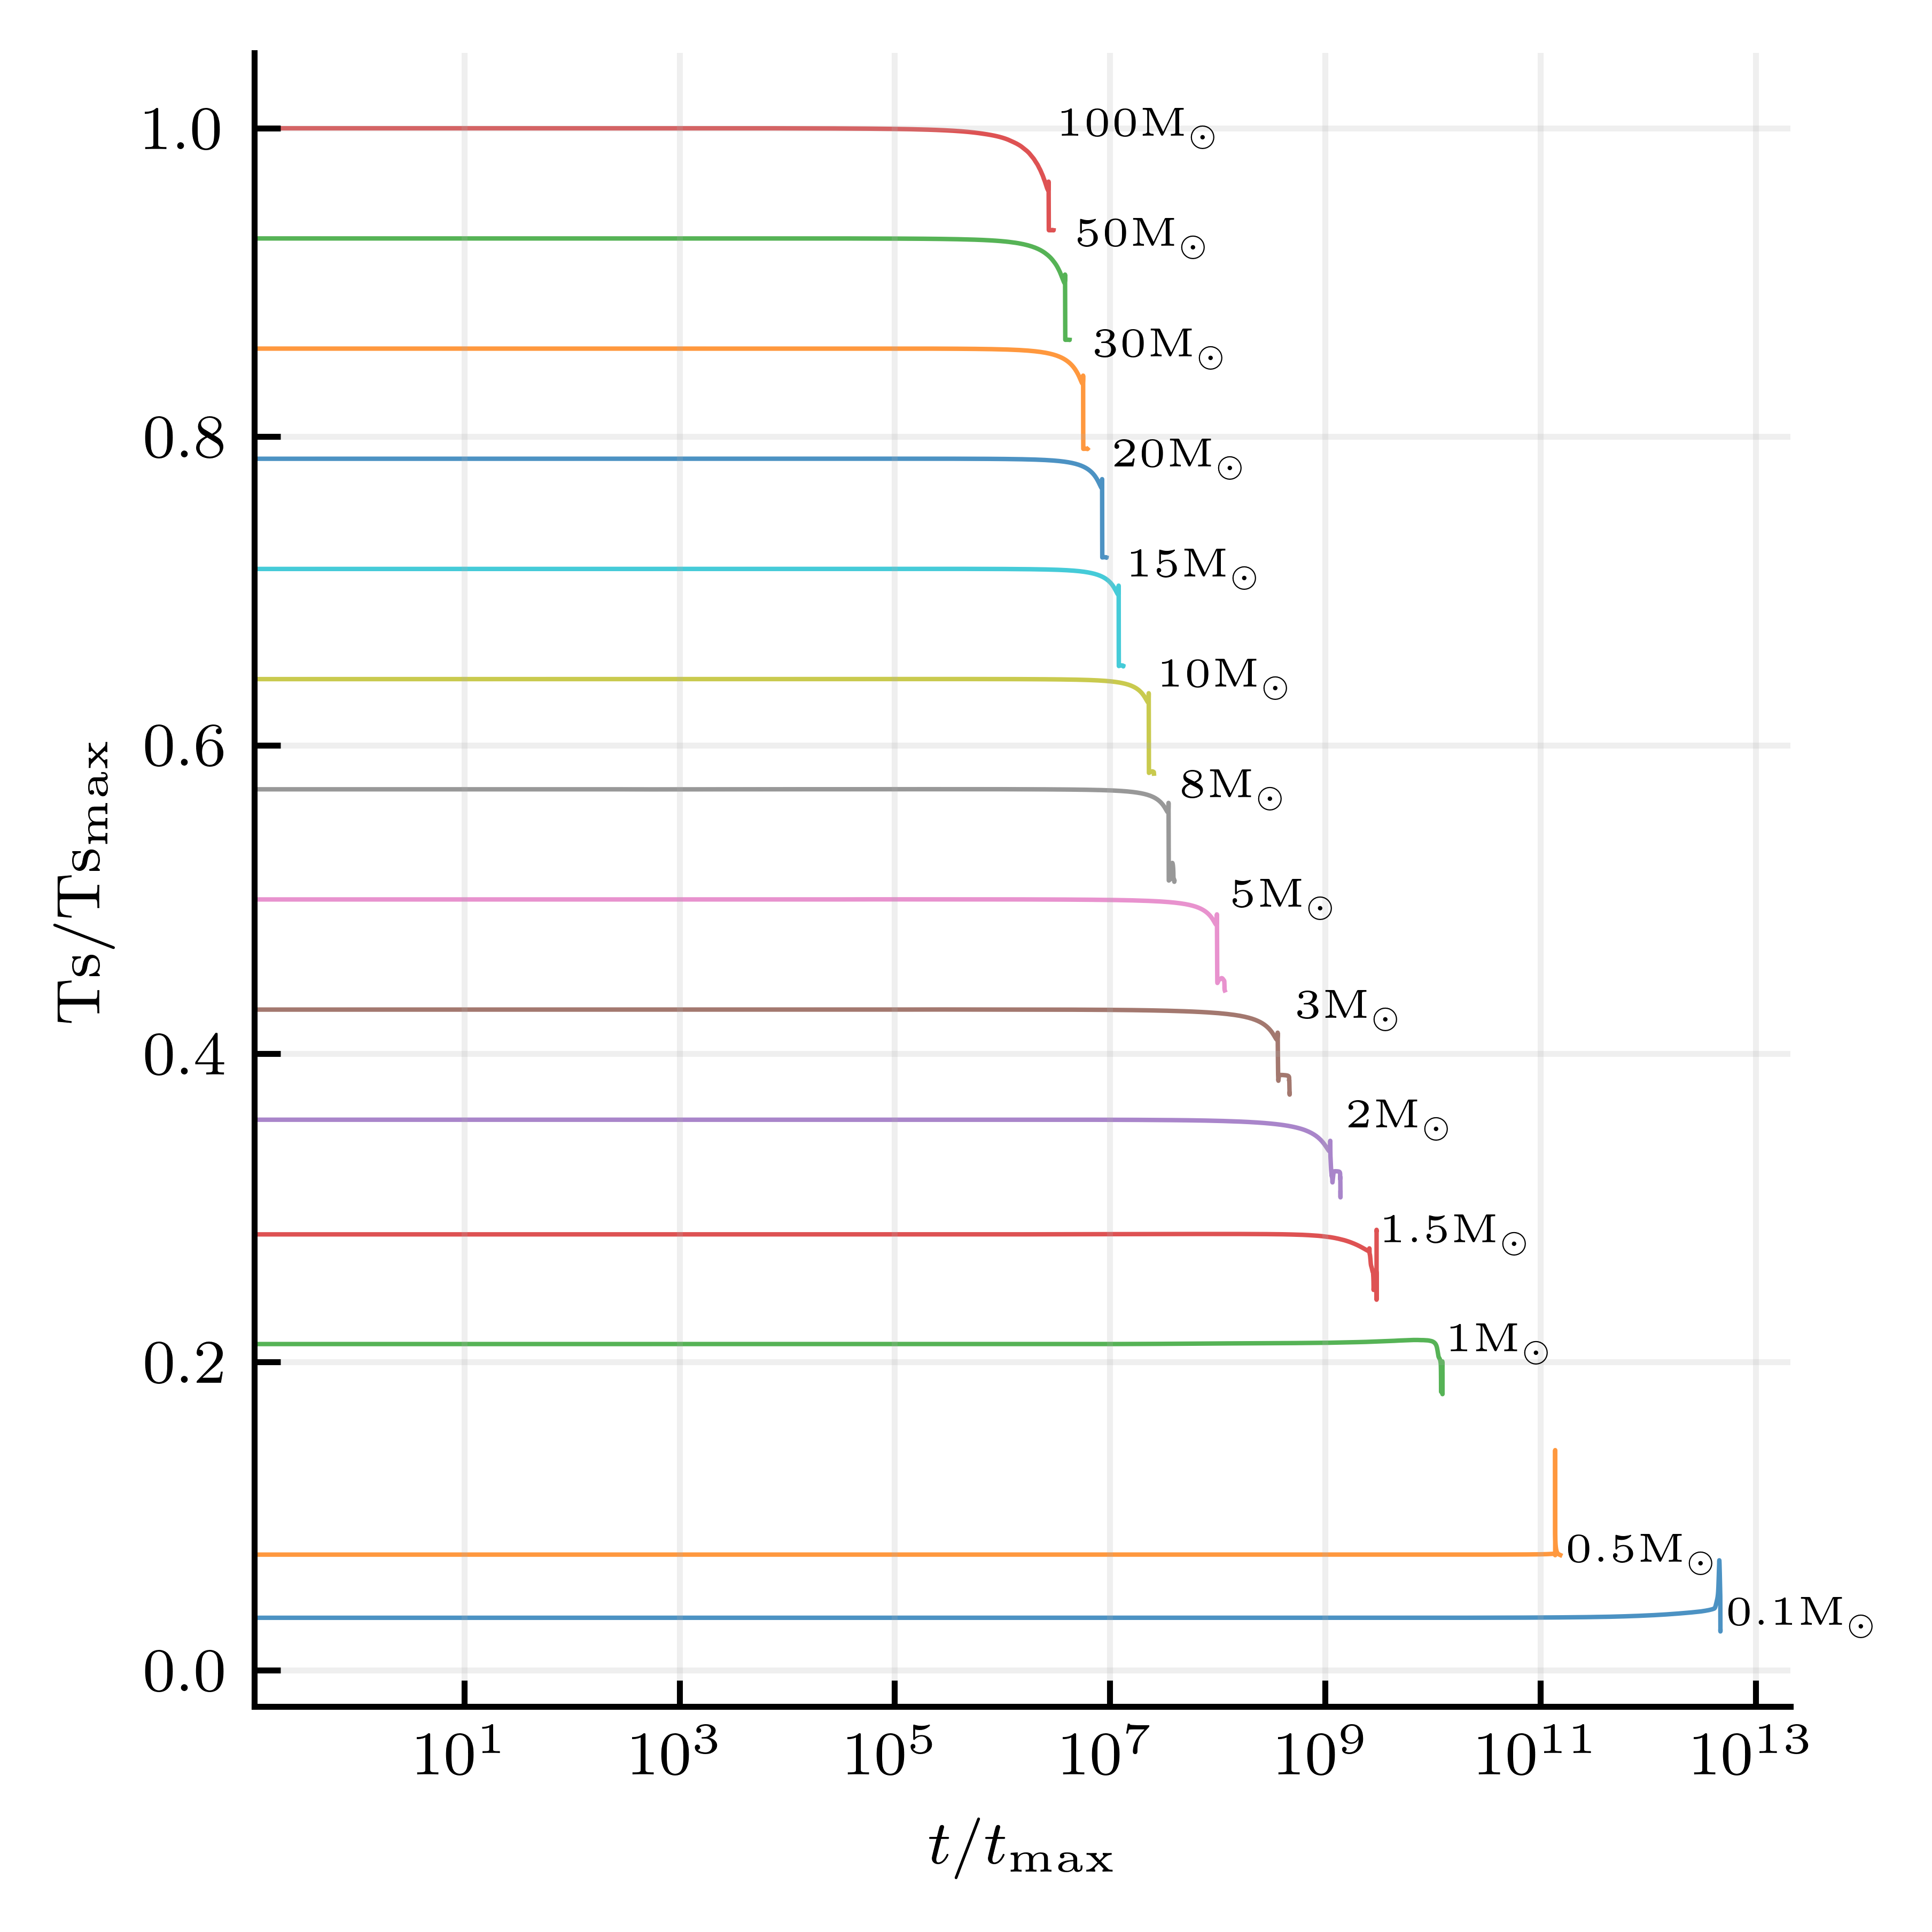

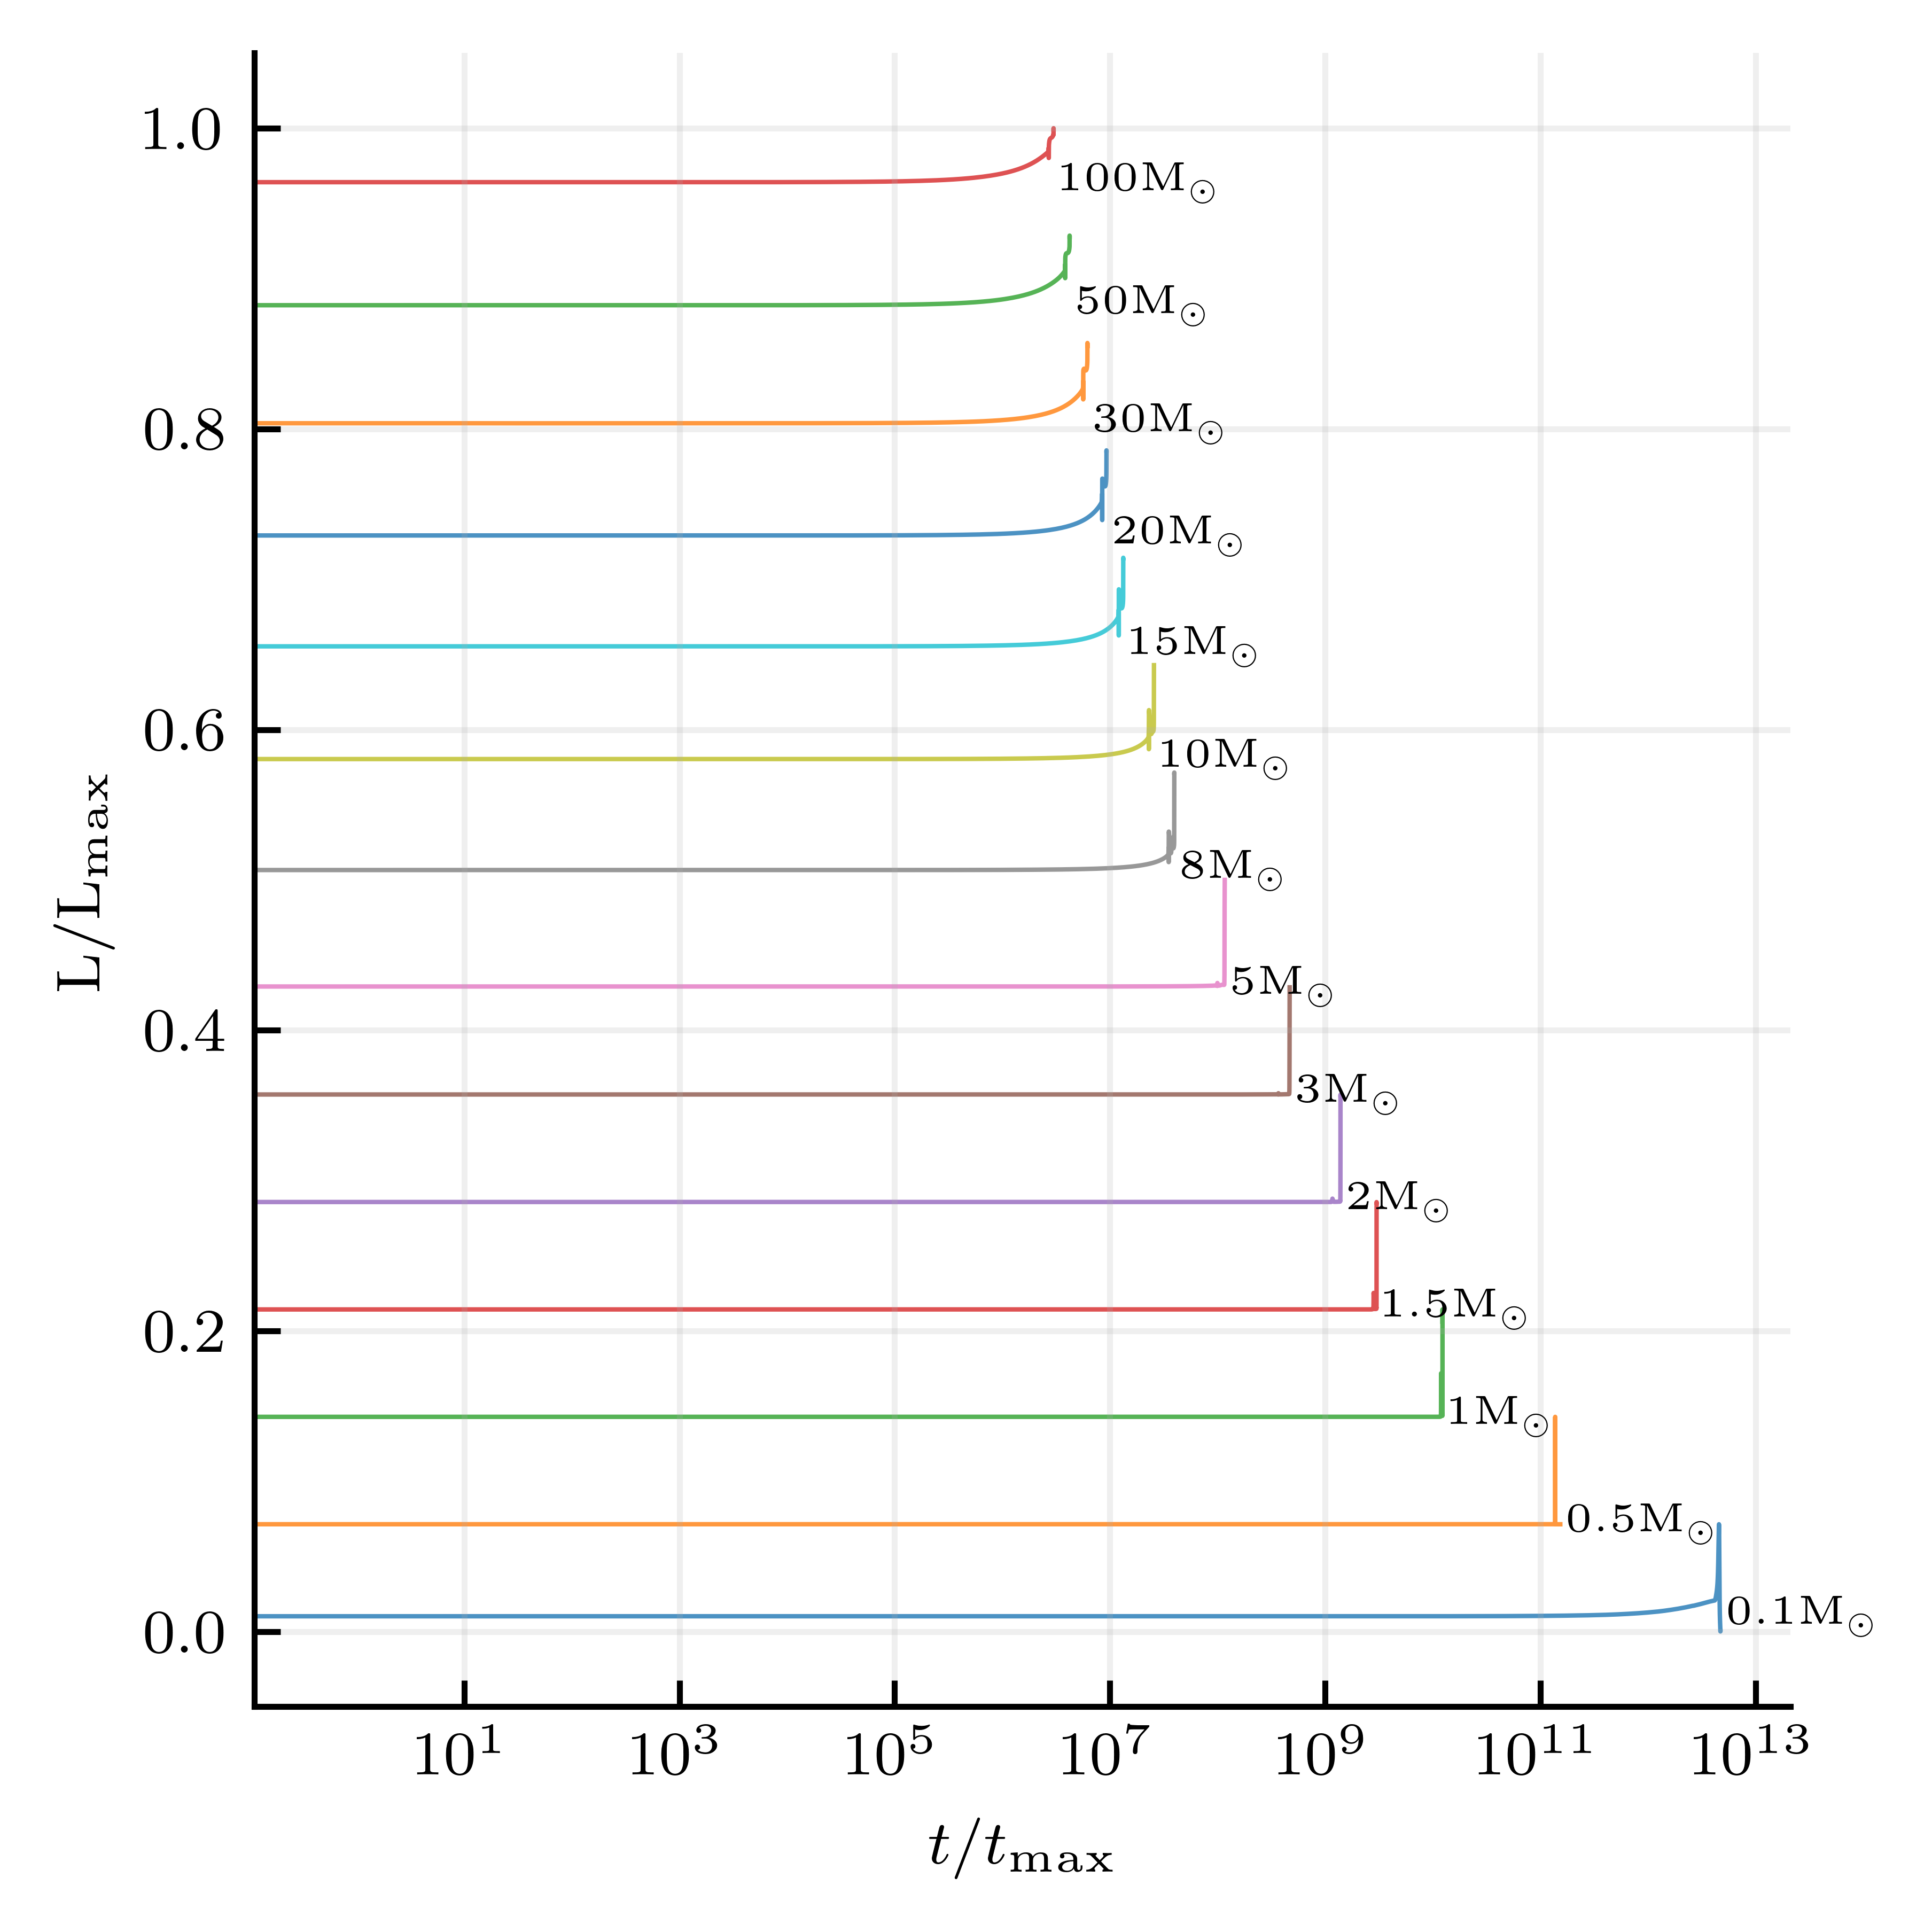

In [57]:
# Time vs Tc and L
def t_v_Tc_L_plots(masses,log_t=False,annotated=False):

    for i,quantity in enumerate(['LogTs','LogL']):

        fig,ax = plt.subplots(figsize=(3.5,3.5))
        cmap = cm.copper
        norm = mcolors.Normalize(vmin=0,vmax=1)

        for j,mass in enumerate(masses):

            # Import data
            df_mass = pd.read_csv(DATA_DIR+'3.2/'+f'{mass:.3g}M/summary.txt',
                    delim_whitespace=True, header=None)
            df_mass.columns = col_names

            y = ((10**df_mass[quantity])/max(10**df_mass[quantity])+j)/len(masses)

            # Plot time evolution
            if log_t == True:
                x = df_mass['t']

                ax.plot(x, y, alpha=0.8, linewidth=0.6, zorder=1)
                ax.set_xscale('log')
                
                if annotated==True:
                    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                                (max(x),y[0]),
                                textcoords="offset points", xytext=(1,0),
                                ha='left', va='center', fontsize=5.5)

            elif log_t == False:
                x = df_mass['t']/max(df_mass['t'])

                ax.plot(x, y, alpha=0.8, linewidth=0.6, zorder=1)
                ax.set_xlim([-.15,1.05])
                
                if annotated==True:
                    ax.annotate(f'{mass:.3g}'+r'$\mathrm{M_\odot}$',
                                (0,y[0]), textcoords="offset points", xytext=(-.1,0),
                                ha='right', va='center', fontsize=5.5)
            
            ax.set_xlabel(r'$t/t_\mathrm{max}$')
            ax.set_ylabel(f'{quantity[3:]}/{quantity[3:]}'+r'$_\mathrm{max}$')

            ax.grid(which='both', alpha=0.2, visible=True)

t_v_Tc_L_plots(masses,log_t=True,annotated=True)